This is a simple Jupyter Notebook example presenting how to use the LPVisu class.

First, import `LPVisu` class and necessary Python packages:

In [13]:
from lp_visu import LPVisuNB
from lp_visu import LPVisu
from scipy.optimize import linprog

import numpy as np

Define the problem:

In [2]:
A = [[1.0, 0.0], [1.0, 2.0], [2.0, 1.0]]
b = [8.0, 15.0, 18.0]
c = [4.0, 3.0]

Define the bounds for the two variables `x1` and `x2`, the GUI bounds and create the visualization object:

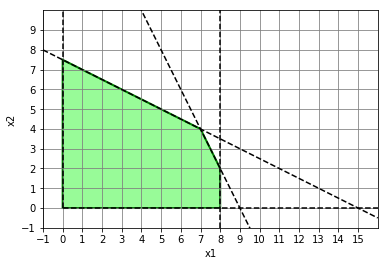

In [19]:
x1_bounds = (0, None)
x2_bounds = (0, None)

x1_gui_bounds = (-1, 16)
x2_gui_bounds = (-1, 10)

visu = LPVisu(A, b, c,
                x1_bounds, x2_bounds,
                x1_gui_bounds, x2_gui_bounds)

Define a simple callback function to be called at each step of the `linprog` simplexe algorithm. This callback function must use a `OptimizeResult` object as parameter:

In [22]:
def lp_simple_callback(optimizeResult):
    """A simple callback function to see what is happening to print each
    step of the algorithm and to use the visualization.

    """

    print("current iteration: " + str(optimizeResult["nit"]))
    print("current slack: " + str(optimizeResult["slack"]))
    print("current solution: " + str(optimizeResult["x"]))
    print()

    LPVisu(A, b, c,
           x1_bounds, x2_bounds,
           x1_gui_bounds, x2_gui_bounds).draw_pivot(optimizeResult["x"])

Solve the problem using the callback function and print the result:

current iteration: 0
current slack: [ 8. 15. 18.]
current solution: [0. 0.]



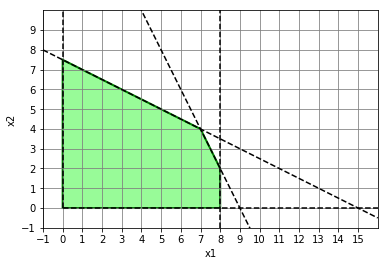

current iteration: 1
current slack: [0. 7. 2.]
current solution: [8. 0.]



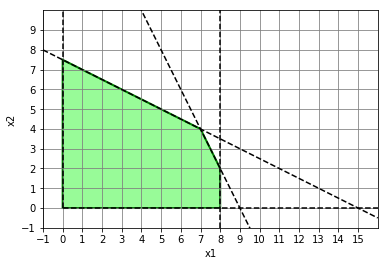

current iteration: 2
current slack: [0. 3. 0.]
current solution: [8. 2.]



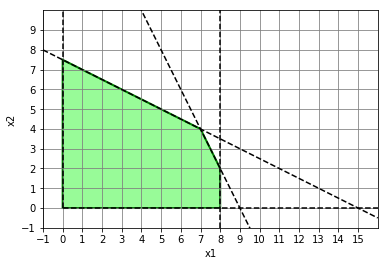

current iteration: 3
current slack: [1. 0. 0.]
current solution: [7. 4.]



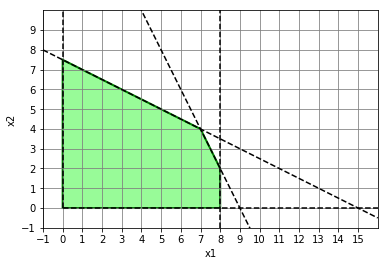

current iteration: 3
current slack: [1. 0. 0.]
current solution: [7. 4.]



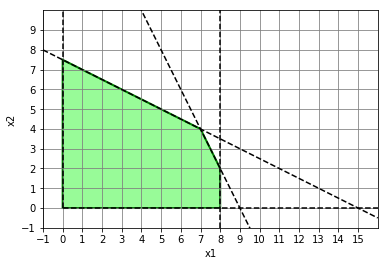

Optimization terminated successfully.
         Current function value: -40.000000  
         Iterations: 3
     con: array([], dtype=float64)
     fun: -40.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([1., 0., 0.])
  status: 0
 success: True
       x: array([7., 4.])


In [23]:
res = linprog(-1.0 * np.array(c), A_ub=A, b_ub=b,
              bounds=(x1_bounds, x2_bounds),
              callback=lp_simple_callback,
              options={"disp": True})

print(res)